# Проектная работа

## Исследование данных о российском кинопрокате



**Описание проекта**: заказчик исследования — Министерство культуры Российской Федерации. 
Работа будет осуществляться с данными, опубликованными на портале открытых данных Министерства культуры. 
Будет проведен анализ фильмов российского кинопроката, часть которых получили государственную поддержку.
Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

**Цель исследования**: выявить текущие тренды рынка российского кинопроката, проанализировать, насколько интересны зрителю фильмы, получившие государственную поддержку.
    
**План работы**: 
* объединение данных о прокатных удостоверениях с данными о прокате в российских кинотеатрах,
* предобработка данных: преобразование типов данных, заполнение пропусков, обработка дубликатов, исправление проблемных категориальных и количественных значений,
* добавление новых столбцов: год проката, ФИ главного режиссера, основной жанр,
* расчет доли гос поддержки,
* исследовательский анализ данных: 
1. анализ проката: динамика проката, доля фильмов с информацией о прокате, 
2. анализ суммы сборов: минимальное, максимальное значения, медиана и среднее значение
3. анализ возрастного ограничения: влияние на сборы, динамика по годам,
* исследование фильмов с гос поддержкой: окупаемость, анализ рейтинга и сборов,
* Общий вывод.

In [1]:
# импортируем все необходимые библиотеки

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns

# настройка вывода формата числа

pd.options.display.float_format = '{:.2f}'.format

### Шаг 1. Откроем файлы с данными и объединим их в один датафрейм. 



In [2]:
# прочитаем файл mkrf_movies

server_path = '/datasets/mkrf_movies.csv'   #сохраняем путь к файлу на сервере 
local_path= 'C:\\Users\\Анна\\Documents\\Проекты\\mkrf_movies.csv'               #сохраняем путь к файлу на компьютере 

try:
    mkrf_movies = pd.read_csv(server_path)    #пробуем найти данные по сетевому адресу
except: 
    mkrf_movies = pd.read_csv(local_path)     #если не находим по сетевому, ищем по локальному

In [3]:
# прочитаем файл mkrf_shows

server_path = '/datasets/mkrf_shows.csv'   #сохраняем путь к файлу на сервере 
local_path= 'C:\\Users\\Анна\\Documents\\Проекты\\mkrf_shows.csv'               #сохраняем путь к файлу на компьютере 

try:
    mkrf_shows = pd.read_csv(server_path)    #пробуем найти данные по сетевому адресу
except: 
    mkrf_shows = pd.read_csv(local_path)     #если не находим по сетевому, ищем по локальному

In [4]:
# выведем первые 5 строк каждого датафрейма

display(mkrf_movies.head())

display(mkrf_shows.head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


,puNumber,box_office
0,111000113,2450.00
1,111000115,61040.00
2,111000116,153030013.40
3,111000117,12260956.00
4,111000118,163684057.79


При объединении таблиц вылезает ошибка, что мы пытаемся объединить таблицы по столбцам с разными типами данных - object и int64.
Проверим типы данных в обеих таблицах.

In [5]:
# Проверим типы данных в таблицах

mkrf_shows.info()

mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 


Столбец puNumber в одной таблице имеет тип int64, а во второй - object. Исправим это.

In [6]:
# переведем в числовые значения столбец puNumber (некорректные значения заменим на NaN с помощью параметра errors='coerce')

mkrf_movies['puNumber'] = pd.to_numeric(mkrf_movies['puNumber'], errors='coerce')

# проверяем типы данных

mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [7]:
# объединим данные в один датафрейм (объединение по левой таблице, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм)

df = mkrf_movies.merge(mkrf_shows, on='puNumber', how='left')

# посмотрим первые 5 строк таблицы

df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915.00,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716.00,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416.00,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916.00,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815.00,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [8]:
# выполним проверку объединения - сравним, сколько значений в столбце box_office старого и нового датафреймов

mkrf_shows.info()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 


Сравниваем количество значений в столбце box_office: в исходном датафрейме - 3158, в объединенном столбце - тоже 3158. Значит, объединение прошло успешно. Далее работаем с датафреймом df. 

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверяем типы данных

- Проверяем типы данных в датафрейме и преобразуем их там, где это необходимо.

In [9]:
# проверяем типы данных

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Анализируем, какие типы данных могут помешать нам при дальнейшем анализе:
* show_start_date - дату необходимо перевести в формат даты
* ratings - рейтинг перевести в числовой формат

In [10]:
# переводим дату премьеры фильма в формат даты

df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M:%S')


In [11]:
# перед тем, как переводить рейтинг в числовой тип данных, посмотрим, какие данные представлены в этом столбце

df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Видим, что есть числа с плавающей запятой, процентные числа и nan.

In [12]:
# с помощью функции преобразуем процентные числа в числа с плавающей запятой

def convert_percent(row):
    """
    Преобразование процентной строки в числовое дробное значение:
     - удаляет %
     - делит на 10, чтобы получить рейтинг, аналогичный рейтингу по десятибальной шкале
    """
    if '%' in row:
        new_val = row.replace('%', '')
        new_val = float(new_val) 
        return new_val / 10
    return row

bool_series = pd.notnull(df['ratings']) 
df.loc[bool_series, 'ratings'].apply(convert_percent).astype(float).unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, 8.2, 7.5, 6.7, 7.9, 5.9, 6.2,
       5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4, 9.9,
       4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6, 4.2,
       5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7, 3.5,
       3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9, 1. ,
       8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

In [13]:
# df.loc[bool_series, 'ratings'] = df.loc[bool_series, 'ratings'].apply(convert_percent) # закомментировала, так как появляется ошибка, подробнее ниже

In [14]:
# сохраним результат функции и переведем столбец 'ratings' в числовой тип

df.loc[bool_series, 'ratings'] = df.loc[bool_series, 'ratings'].apply(convert_percent)    

df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')


In [15]:
df[df['ratings'] == 9.9]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
259,Прошлое,221030715.00,2015-07-29 12:00:00+00:00,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...",Аргентина - Бразилия,Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,9.90,"ужасы,триллер,драма",NaN
1341,Сказка о добре и Вре,111008913.00,2013-11-15 12:00:00+00:00,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,9.90,"триллер,драма,детектив",NaN
1805,Спираль.,111001014.00,2014-01-30 12:00:00+00:00,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,9.90,"аниме,мультфильм,ужасы",4295.00
6882,Животные рядом со Святыми,112003719.00,2019-05-03 12:00:00+00:00,Документальный,"ООО ""Кинопрограмма ""XXI век""",Россия,Т.Мирошник,"В.Есинов, Е.Калинина",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,9.90,"криминал,драма",NaN


Проверив данные фильмы по Кинопоиску делаем вывод, что процентные значения - это вовсе не рейтинг.

In [16]:
# проверим типы всех столбцов

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7485 non-null   float64            
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

Мы поменяли типы данных в нужных местах, чтобы данные стали пригодными для дальнейшего анализа.

#### Шаг 2.2. Изучим пропуски в датафрейме

- Объясним, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [17]:
# проверим пропущенные значения

df.isna().sum()

title                       0
puNumber                    1
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

Пропущенные значения есть в столбцах:
* номер прокатного удостоверения - данных для заполнения нет, оставим незаполненным
* студия-производитель - не будем заполнять, т к в дальнейшем не используются
* страна-производитель - не будем заполнять, т к в дальнейшем не используются
* режиссер - значения этого столбца нужны в дальнейшем, но заполнять нечем, т к в большинстве случаев это не фильмы, а концерты
* продюсер - не будем заполнять, т к в дальнейшем не используются
* refundable_support, nonrefundable_support, financing_source, budget — показатели государственного финансирования. В этом случае пропуски заполнять не нужно, т к пропущенные значения означают, что фильм снимался не за счет гос. средств
* рейтинг, жанр, сборы в рублях  - не будем заполнять, т к пропущенных слишком много, чтобы вручную каждый искать и заполнять.

#### Шаг 2.3. Изучим дубликаты в датафрейме
- Проверим, есть ли в данных дубликаты. Опишем причины, которые могли повлиять на появление дублей.

In [18]:
# проверяем количество грубых дубликатов

print(df.duplicated().sum())



0


Проверив грубые дубликаты, мы их не обнаружили.
Исходя из того, что могут быть еще неявные  дубликаты, проанализируем, в каких столбцах нам не нужны повторы (дубликаты). Это столбцы - название фильма и номер прокатного удостоверения.

In [19]:
# проверим уникальные значения в колонках с названием фильмов и номером прокатного удостоверения

display(df['title'].value_counts().sort_values(ascending=False).head(20))

display(df['puNumber'].value_counts().sort_values(ascending=False).head(20))

# отфильтруем первые два дубликата по названию фильма

display(df[df['title'] == "День святого Валентина_"])

display(df[df['title'] == "Белая мгла /По комиксу Грега Рукка и Стива Либера/"])

# отфильтруем дубликаты по номеру прокатного удостоверения

display(df[df['puNumber'] == 221054410.0])

display(df[df['puNumber'] == 221154310.0])

День святого Валентина_                                        5
Там, где живут чудовища                                        4
Шерлок Холмс                                                   4
Дитя тьмы                                                      4
Жена путешественника во времени                                4
Знакомство с Факерами 2.                                       4
Двойной копец                                                  4
Непокоренный.                                                  4
Начало_                                                        4
Лузеры                                                         4
Прощание                                                       4
Кошки против собак: Месть Китти Галор                          4
Код доступа "Кейптаун"                                         4
Красавчик-2                                                    4
Белая мгла /По комиксу Грега Рукка и Стива Либера/             4
Белоснежка и охотник     

221154310.00    2
221054410.00    2
112000515.00    1
121028212.00    1
111001214.00    1
121013111.00    1
121010510.00    1
121013013.00    1
221103810.00    1
111018419.00    1
111013818.00    1
221053612.00    1
121013715.00    1
124006419.00    1
124000919.00    1
121008912.00    1
124003114.00    1
221038510.00    1
121031519.00    1
111011719.00    1
Name: puNumber, dtype: int64

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3902,День святого Валентина_,221083810.00,2010-07-15 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.70,"мелодрама,комедия",NaN
3991,День святого Валентина_,221068010.00,2010-05-14 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.70,"мелодрама,комедия",NaN
4070,День святого Валентина_,121002210.00,2010-02-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.70,"мелодрама,комедия",NaN
4196,День святого Валентина_,221136210.00,2010-11-30 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.70,"мелодрама,комедия",NaN
5070,День святого Валентина_,221066410.00,2010-06-01 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.70,"мелодрама,комедия",NaN


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3795,Белая мгла /По комиксу Грега Рукка и Стива Либ...,221010210.00,2010-01-15 12:00:00+00:00,Художественный,"Уорнер Бразерс, Дарк Касл Интертейнмент, Дон К...",США-Канада-Франция,Доминик Сена,Джоэл Сильвер,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.10,"ужасы,боевик,триллер",NaN
3903,Белая мгла /По комиксу Грега Рукка и Стива Либ...,221084010.00,2010-07-15 12:00:00+00:00,Художественный,"Уорнер Бразерс, Дарк Касл Интертейнмент, Дон К...",США-Канада-Франция,Доминик Сена,Джоэл Сильвер,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.10,"ужасы,боевик,триллер",NaN
4079,Белая мгла /По комиксу Грега Рукка и Стива Либ...,221003910.00,2010-01-19 12:00:00+00:00,Художественный,"Уорнер Бразерс, Дарк Касл Интертейнмент, Дон К...",США-Канада-Франция,Доминик Сена,Джоэл Сильвер,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.10,"ужасы,боевик,триллер",NaN
4569,Белая мгла /По комиксу Грега Рукка и Стива Либ...,221150810.00,2010-12-16 12:00:00+00:00,Художественный,"Уорнер Бразерс, Дарк Касл Интертейнмент, Дон К...",США-Канада-Франция,Доминик Сена,Джоэл Сильвер,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.10,"ужасы,боевик,триллер",NaN


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5067,Анализируй это!,221054410.00,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"комедия,криминал",NaN
5068,Анализируй то!,221054410.00,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.80,"комедия,криминал",NaN


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310.00,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310.00,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN


Выявлено много неявных дубликатов в названии фильма и два дубликата в номере прокатного удостоверения.
Сначала решим, что делать с дубликатами в номере прокатного удостоверения.
В первом случае, речь о двух частях одного фильма.
Во втором случае, речь идет о двух разных фильмах, а номер прокатного удостоверения один и тот же.
Оставим оба.

Вернемся к дубликатам в названии фильма.
Проверив первые два фильма, предположим, что дублирование происходит по причине нескольких дат премьеры фильма и разных номеров прокатного удостоверения.
Не найдя точной информации, как один и тот же фильм может получить несколько прокатных удостоверений и несколько дат премьеры, я остановилась на версии, что разница заключается в том, каким образом транслировался фильм: кинотеатр, ТВ или онлайн-показ.
Но так как речь идет об одном и том же фильме, и для дальнейших анализов нам просто нужен конкретный фильм, предлагаю удалить дубликаты фильмов.
Для этого вычленим из даты премьеры год, удалим полную дату премьеры и удалим столбец с номером прокатного удостоверения. Очищенную таблицу назовем df_cleaned.
Удалим явные дубликаты в получившейся таблице df_cleaned.
При этом, если фильм будет иметь разные года премьеры, он останется не удаленным, так как, в этом случае, скорее всего речь пойдет о разных фильмах, например, вторая часть фильма или ремейк фильма.

In [20]:
# создадим столбец с годом премьеры фильма

df['year'] = df['show_start_date'].dt.year

# создадим очищенный датафрейм, удалив полную дату и номер прокатного удостоверения

df_cleaned = df.drop('show_start_date', 1)

df_cleaned = df_cleaned.drop('puNumber', 1)

# проверим количество грубых дубликатов

print(df_cleaned.duplicated().sum())

# выведем на экран первые 10 строк очищенного датафрейма

df_cleaned.head(10)


276


,title,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
0,Открытый простор,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,2016
2,Особо опасен,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016
3,Особо опасен,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016
4,Особо опасен,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2015
5,Остановился поезд,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,NaN,2016
6,Любовь и голуби,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.30,"мелодрама,комедия",2700.00,2013
7,Любовь и сигареты,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.60,"мюзикл,мелодрама,комедия",NaN,2014
8,Отпетые мошенники.,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.00,"комедия,криминал",NaN,2016
9,Отпуск за свой счет,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"мелодрама,комедия",NaN,2014


In [21]:
# удалим грубые дубликаты и проверим, как сработал код

df_cleaned = df_cleaned.drop_duplicates().reset_index(drop=True)

df_cleaned.duplicated().sum()

0

In [22]:
# проверим неявные дубликаты в названии фильма

df_cleaned['title'].value_counts().sort_values(ascending=False).head(20)

Гарри Поттер и Дары Смерти - Часть 1/По роману Дж.К.Ролинг/    4
Прощание                                                       4
Рапунцель: Запутанная история                                  4
Неудержимые.                                                   3
Белоснежка и охотник                                           3
Лесной патруль                                                 3
Машина Джейн Мэнсфилд                                          3
Гарри Поттер и орден Феникса /По роману Дж.К.Ролинг/           3
Багровый пик                                                   3
Она                                                            3
Успех                                                          3
Медведь Йоги                                                   3
Неудержимые 2                                                  3
Гарри Поттер и узник Азкабана /По роману Дж.К.Ролинг/          3
Алекс и Эмма                                                   3
Арктика 3D               

In [23]:
# выведем строки с первыми тремя фильмами, которые являются неявными дубликатами

display(df_cleaned[df_cleaned['title'] == "Прощание"])

display(df_cleaned[df_cleaned['title'] == "Гарри Поттер и Дары Смерти - Часть 1/По роману Дж.К.Ролинг/"])

display(df_cleaned[df_cleaned['title'] == "Рапунцель: Запутанная история"])


,title,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
265,Прощание,Художественный,"Киностудия ""Мосфильм""",СССР,Э.Климов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.20,драма,NaN,2014
5242,Прощание,Художественный,Всероссийский государственный институт кинемат...,Россия,А.Петровская,В.Найговзина,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.20,драма,NaN,2017
6633,Прощание,Художественный,ИП Киселев Алексей Евгеньевич,Россия,М.Фомина,А.Киселев,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.20,драма,NaN,2019
7005,Прощание,Художественный,"Биг Бич Филмз, Депз оф Филд, Киндред Спирит",США,Лулу Ванг,"Анита Го, Даниэль Тейт Мелиа, Эндрю Миано",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.20,драма,2617932.50,2019


,title,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
370,Гарри Поттер и Дары Смерти - Часть 1/По роману...,Художественный,"Уорнер Бразерс, Хэйдэй Филмз",США - Великобритания,Дэвид Йейтс,"Дейвид Баррон, Дейвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.10,"фэнтези,драма,детектив",745510.00,2016
4090,Гарри Поттер и Дары Смерти - Часть 1/По роману...,Художественный,"Уорнер Бразерс, Хэйдэй Филмз",США - Великобритания,Дэвид Йейтс,"Дейвид Баррон, Дейвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.10,"фэнтези,драма,детектив",1700.00,2010
4379,Гарри Поттер и Дары Смерти - Часть 1/По роману...,Художественный,"Уорнер Бразерс, Хэйдэй Филмз",США - Великобритания,Дэвид Йейтс,"Дейвид Баррон, Дейвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.10,"фэнтези,драма,детектив",NaN,2010
4843,Гарри Поттер и Дары Смерти - Часть 1/По роману...,Художественный,"Уорнер Бразерс, Хэйдэй Филмз",США - Великобритания,Дэвид Йейтс,"Дейвид Баррон, Дейвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.10,"фэнтези,драма,детектив",NaN,2011


,title,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
377,Рапунцель: Запутанная история,Анимационный,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерз",США,"Натан Грино, Байрон Ховард",Рой Конли,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.90,"мультфильм,мюзикл,фэнтези",NaN,2014
378,Рапунцель: Запутанная история,Анимационный,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерз",США,"Натан Грино, Байрон Ховард",Рой Конли,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.90,"мультфильм,мюзикл,фэнтези",NaN,2012
4251,Рапунцель: Запутанная история,Анимационный,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерз",США,"Натан Грино, Байрон Ховард",Рой Конли,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.90,"мультфильм,мюзикл,фэнтези",17055.00,2010
4572,Рапунцель: Запутанная история,Анимационный,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерз",США,"Натан Грино, Байрон Ховард",Рой Конли,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.90,"мультфильм,мюзикл,фэнтези",NaN,2010


Неявные дубликаты в названии фильма частично удалены, но их остается еще очень много.
Часть из них не являются дубликатами, так как это разные фильмы с одинаковыми названиями.
Но есть и сложные случаи, когда дубликаты происходят из-за наличия информации в колонке со сборами (как например, фильм "Рапунцель: Запутанная история" 2010 г имеет две строчки - одна с информацией по сбору, вторая - без этой информации).
Чтобы понять, как поступить с такими фильма, проведем эксперимент. 
Создадим таблицу df_experiment, из которой будет удален столбец box_office, и после этого удалим грубые дубликаты.


In [24]:
# создаем экспериментальный датафрейм, из которого удалим столбец со сборами

df_experiment = df_cleaned.drop('box_office', 1)

# удаляем грубые дубликаты

df_experiment = df_experiment.drop_duplicates().reset_index(drop=True)

# проверяем неявные дубликаты по названию фильма

display(df_experiment['title'].value_counts().sort_values(ascending=False).head(20))

# отфильтровываем некоторые из этих фильмов

display(df_experiment[df_experiment['title'] == "Алекс и Эмма"])

display(df_experiment[df_experiment['title'] == "Турист"])

display(df_experiment[df_experiment['title'] == "Успех"])

display(df_experiment[df_experiment['title'] == "Паранормальные явления 2"])


Прощание                                                       4
Машина Джейн Мэнсфилд                                          3
Дом грёз                                                       3
Рапунцель: Запутанная история                                  3
Успех                                                          3
Дитя тьмы                                                      3
Алекс и Эмма                                                   3
Отверженные /По одноименному произведению Виктора Гюго/        3
Арктика 3D                                                     3
Турист                                                         3
Гарри Поттер и Дары Смерти - Часть 1/По роману Дж.К.Ролинг/    3
Механик_                                                       3
Там, где живут чудовища                                        3
Лузеры                                                         2
Паранормальное явление 5: Призраки в 3 D                       2
Вечное возвращение.      

,title,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,year
39,Алекс и Эмма,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.40,"мелодрама,комедия",2015
40,Алекс и Эмма,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.40,"мелодрама,комедия",2016
4341,Алекс и Эмма,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.40,"мелодрама,комедия",2010


,title,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,year
4457,Турист,Художественный,"ДжиКей Филмз, Спайгласс Интертейнмент, Студио ...",США - Франция,Флориан Хенкель фон Доннерсмарк,"Гэри Барбер, Риджер Бирнбаум, Джонатан Гликман...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.10,боевик,2010
4556,Турист,Художественный,"ДжиКей Филмз, Спайгласс Интертейнмент, Студио ...",США - Франция,Флориан Хенкель фон Доннерсмарк,"Гэри Барбер, Риджер Бирнбаум, Джонатан Гликман...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.10,боевик,2011
5815,Турист,Художественный,ИП Казиев Михаил Эльшадович,Россия,Д.Кудрявцев,Д.Кудрявцев,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.10,боевик,2018


,title,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,year
305,Успех,Художественный,"Киностудия ""Мосфильм""",СССР,К.Худяков,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,драма,2014
5560,Успех,Художественный,Сунцов Валентин Валерьевич,Россия,В.Сунцов,В.Сунцов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,драма,2018
6941,Успех,Художественный,"ООО ""Кинодом""",Россия,П.Руминов,"С.Бобза, Г.Малков, В.Поляков, М.Кучмент",«12+» - для детей старше 12 лет,5000000.00,20000000.00,75000000.00,Фонд кино,7.80,драма,2019


,title,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,year
4115,Паранормальные явления 2,Художественный,Парамаунт Пикчерз,США,Тод Уильямс,"Джейсон Блан, Орен Пели",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.90,ужасы,2010
4650,Паранормальные явления 2,Художественный,Парамаунт Пикчерз,США,Тод Уильямс,"Джейсон Блан, Орен Пели",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.90,ужасы,2011


Просмотрев некоторые из фильмов, видим, что данные теперь очищены от неявных дубликатов. Однако, потеряна очень важная колонка box_office.


In [25]:
# посчитаем, сколько повторяющихся фильмов в датафрейме df_cleaned

# создадим датафрейм с уникалльными названиями фильмов

df2 = df_cleaned['title'].value_counts().to_frame()

# дадим название столбцу со счетчиком

df2.columns = ['count']

# переведем столбец в числовой тип данных

df2['count'] = pd.to_numeric(df2['count'], errors='coerce')

# посчитаем количество строк с повторяющимися фильмами

df2.loc[df2['count'] > 1].count()

count    406
dtype: int64

In [26]:
# по аналогии посчитаем, сколько повторяющихся фильмов в датафрейме df_experiment

df1 = df_experiment['title'].value_counts().to_frame()

df1.columns = ['count']

df1['count'] = pd.to_numeric(df1['count'], errors='coerce')

df1.loc[df1['count'] > 1].count()

count    319
dtype: int64

Таким образом, можно было удалить еще 87 фильмов - неявных дубликатов. Однако, мы этого делать не будем, так как способ удаления предполагает исключение очень важной колонки со сборами.
87 фильмов это немного более 1% от всех фильмов, оставим их, так как искажение будет незначительным.

Итак, продолжаем работать с датафреймом df_cleaned. 
Кроме этого создадим датафрейм с названием фильма, номером прокатного удостоверения и полной датой выхода премьеры, чтобы эти данные не были потеряны.

#### Шаг 2.4. Изучим категориальные значения

- Посмотрим, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправим проблемные значения в поле `type`.



In [28]:
# выведем на экран первые 5 строк датафрейма

display(df_cleaned.head(5))

# посмотрим уникальные значения в основных категориальных столбцах

print(df_cleaned['type'].value_counts().sort_values(ascending=False))

print(df_cleaned['age_restriction'].value_counts().sort_values(ascending=False))

print(df_cleaned['genres'].value_counts().sort_values(ascending=False))

df_cleaned['film_studio'].value_counts().sort_values(ascending=False)

,title,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
0,Открытый простор,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,2016
2,Особо опасен,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016
3,Особо опасен,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2015
4,Остановился поезд,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,NaN,2016


Художественный                4260
 Художественный               1388
Анимационный                   818
Прочие                         404
Документальный                 285
Научно-популярный               53
 Анимационный                    1
Музыкально-развлекательный       1
Name: type, dtype: int64
«16+» - для детей старше 16 лет           2687
«18+» - запрещено для детей               1559
«12+» - для детей старше 12 лет           1548
«0+» - для любой зрительской аудитории     792
«6+» - для детей старше 6 лет              624
Name: age_restriction, dtype: int64
драма                          469
комедия                        343
мелодрама,комедия              195
драма,мелодрама                177
драма,мелодрама,комедия        177
                              ... 
фантастика,фэнтези,детектив      1
биография,мелодрама,драма        1
документальный,ужасы,боевик      1
мелодрама,история,драма          1
ужасы,комедия,криминал           1
Name: genres, Length: 742, dtype: int64

Киностудия "Мосфильм"                                                                                                                                                                                                                     341
ООО "Мульт в кино"                                                                                                                                                                                                                         57
Анимаккорд Лтд                                                                                                                                                                                                                             23
ООО "Мульт в кино"                                                                                                                                                                                                                         18
ФГУП "ТПО "Киностудия "Союзмультфильм"          

Проверив 4 столбца с категориальными данными: тип фильма, студия, возрастная категория и жанр - обнаружили лишние пробелы в наименовании типа фильмов Художественный и анимационный, заменим на корректные значения.

In [29]:
# заменим типы фильмов на корректные

df_cleaned.loc[df_cleaned['type'] == ' Художественный', 'type'] = 'Художественный'

df_cleaned.loc[df_cleaned['type'] == ' Анимационный', 'type'] = 'Анимационный'

# проверим, как сработал код

df_cleaned['type'].value_counts().sort_values(ascending=False)

Художественный                5648
Анимационный                   819
Прочие                         404
Документальный                 285
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

In [30]:
# посмотрим уникальные значения в категориальных столбцах

print(df_cleaned['production_country'].value_counts().sort_values(ascending=False))

print(df_cleaned['financing_source'].value_counts().sort_values(ascending=False))

print(df_cleaned['director'].value_counts().sort_values(ascending=False))

print(df_cleaned['producer'].value_counts().sort_values(ascending=False))

США                                                1990
Россия                                             1815
СССР                                                347
Франция                                             294
Великобритания                                      255
                                                   ... 
Франция - Великобритания - Камбоджа - США - КНР       1
Германия-Австрия-Франция-Италия                       1
США - Чехия - Франция                                 1
Великобритания, США, Испания                          1
Германия - Франция - Канада                           1
Name: production_country, Length: 950, dtype: int64
Министерство культуры               164
Фонд кино                           146
Министерство культуры, Фонд кино     22
Name: financing_source, dtype: int64
О.Семёнова                                 47
Д.Червяцов                                 17
Ридли Скотт                                15
Стивен Содерберг                     

В категориальных столбцах прослеживается проблемы: использованы разные данные - строки, списки строк, строки со знаком тире. Такие данные не получится разбить по категориям.

#### Шаг 2.5. Проверим количественные значения

- Проверим, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?



In [31]:
# проверим уникальные значения в столбцах с бюджетом и сборами

display(df_cleaned['box_office'].value_counts().head(50))

df_cleaned['budget'].value_counts().head(50)

0.00        24
200.00      13
300.00      12
360.00       9
400.00       8
250.00       8
500.00       8
600.00       7
150.00       6
550.00       6
100.00       6
1700.00      5
1600.00      5
420.00       5
240.00       5
120.00       5
450.00       5
900.00       4
1000.00      4
750.00       4
780.00       4
540.00       4
1200.00      4
2000.00      3
350.00       3
225.00       3
1950.00      3
760.00       3
6000.00      3
650.00       3
5000.00      3
520.00       3
2200.00      3
1900.00      3
1100.00      3
180.00       3
1820.00      3
2820.00      3
1360.00      3
1020.00      2
1660.00      2
9000.00      2
370.00       2
1580.00      2
12910.00     2
4960.00      2
620.00       2
1070.00      2
2400.00      2
125.00       2
Name: box_office, dtype: int64

0.00            17
38000000.00      6
80000000.00      4
50000000.00      4
40000000.00      3
38500000.00      3
37142857.00      3
54000000.00      2
150000000.00     2
300000000.00     2
42000000.00      2
54687500.00      2
60000000.00      2
39000000.00      2
37878787.00      2
120000000.00     2
292412422.00     1
128570000.00     1
47200000.00      1
67942718.00      1
204674000.00     1
74071918.00      1
493733957.00     1
52124638.00      1
39700000.00      1
37000990.00      1
499826569.00     1
43000000.00      1
37943652.00      1
71517631.00      1
44600000.00      1
360000000.00     1
240153900.00     1
40574140.00      1
55195000.00      1
31305313.00      1
298500000.00     1
69883049.00      1
40287770.00      1
157236080.00     1
139551503.00     1
138325738.00     1
57876000.00      1
130000000.00     1
944000000.00     1
80324137.00      1
148585222.00     1
35760060.00      1
35714286.00      1
684200536.00     1
Name: budget, dtype: int64

Проверены уникальные значения в столбцах с бюджетом и сборами.
Вызывают подозрения очень низкие значения сборов, и таких значений очень много. Изменить мы их не сможем, только дать заказчику рекомендации по проверке данных. 

In [32]:
# проверим нет ли таких фильмов, для которых бюджет оказался меньше суммарной поддержки

df_cleaned[(df_cleaned['nonrefundable_support'] + df_cleaned['refundable_support']) > df_cleaned['budget']]

,title,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
1994,14+,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,23000000.00,0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,10234016.10,2014
1999,Дуxless 2,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,75000000.00,0.00,Фонд кино,6.60,драма,446163511.00,2015
2398,Воин (2015),Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.00,70000000.00,0.00,Фонд кино,7.80,"боевик,драма,криминал",196572438.40,2015
2458,Бармен.,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.00,0.00,0.00,Фонд кино,6.20,"комедия,фэнтези",67418974.80,2015
2538,Савва. Сердце воина,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.00,100000000.00,0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези",184487551.40,2015
2607,Тряпичный союз,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,59000000.00,0.00,Фонд кино,6.30,"комедия,драма",1957738.51,2015
2710,Срочно выйду замуж,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,35000000.00,0.00,Фонд кино,5.10,"комедия,мелодрама",72937783.20,2015
2796,Помню - не помню!,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,6000000.00,0.00,Министерство культуры,4.30,комедия,15362931.43,2016
2969,Любовь с ограничениями,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.00,51000000.00,0.00,Фонд кино,6.30,"комедия,мелодрама",70299052.00,2016
3483,Притяжение (2016),Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,250000000.00,0.00,Фонд кино,5.60,фантастика,1038321489.00,2016


Мы видим фильмы с бюджетом 0 руб., но при этом с суммами в столбцах _support, очевидно, что в этом случае, бюджет указан неверный.

In [33]:
# посмотрим статистические данные в количественных столбцах

df_cleaned[['refundable_support', 'nonrefundable_support', 'budget', 'ratings', 'box_office']].describe()

,refundable_support,nonrefundable_support,budget,ratings,box_office
count,332.00,332.00,332.00,6247.00,3158.00
mean,11864457.83,48980988.89,127229716.68,6.48,76478696.16
std,24916555.26,59980117.92,188588333.12,1.12,240353122.82
min,0.00,0.00,0.00,1.00,0.00
25%,0.00,25000000.00,42000000.00,5.90,86239.00
50%,0.00,30000000.00,68649916.00,6.60,2327987.55
75%,15000000.00,40375000.00,141985319.50,7.20,23979671.02
max,180000000.00,400000000.00,2305074303.00,9.90,3073568690.79


Данные в столбцах 'refundable_support', 'nonrefundable_support', 'budget' указаны только для фильмов с гос поддержкой. В столбцах 'refundable_support', 'nonrefundable_support' они могут быть нулевыми, а вот в столбце 'budget' ноль будет означать ошибку.

(0.0, 180000000.0)

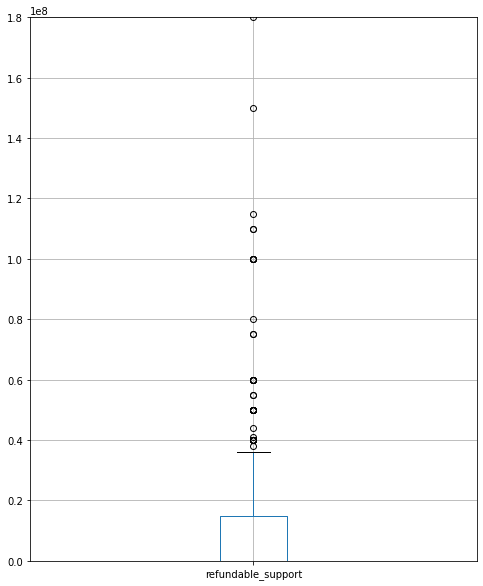

In [34]:
# построим диаграмму размаха по столбцу 'refundable_support'

df_cleaned[['refundable_support']].boxplot(figsize=(8, 10))
plt.ylim(0, 180000000)

В столбце объем возвратных средств разброс значений очень велик, в наборе данных серьезные аномалии, среднее несопоставимо больше медианы. Медиана равна нулю, это значит, что как минимум половина значений нулевые. После 35 млн руб наблюдаются выбросы.
Попробуем исключить нулевые значения.

In [35]:
# посмотрим статистические данные

df_cleaned[['refundable_support']].query('refundable_support != 0').describe()

,refundable_support
count,111.00
mean,35486486.49
std,31972875.36
min,3500000.00
25%,15000000.00
50%,25000000.00
75%,50000000.00
max,180000000.00


(3500000.0, 180000000.0)

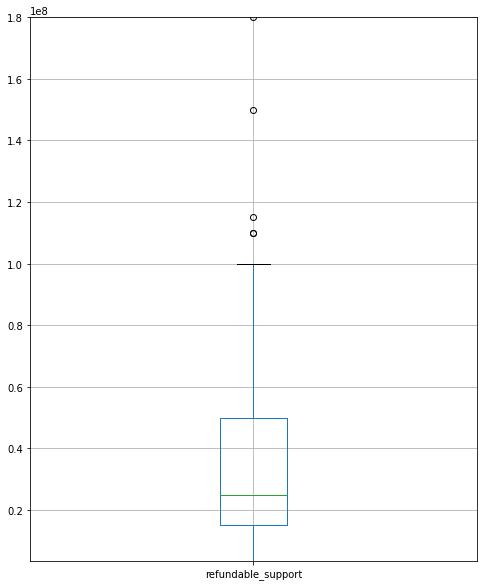

In [36]:
# построим диаграмму размаха

df_cleaned[['refundable_support']].query('refundable_support != 0').boxplot(figsize=(8, 10))
plt.ylim(3500000, 180000000)

Проанализировав статистические данные и график разброса по объему возвратных средств для фильмов с гос поддержкой, видим  высокое стандартное отклонение, что все же доказывает наличие аномалий и выбросов. Среднее значение почти на 50% больше медианы. После 100 млн руб находятся аномальные значения. Посчитаем их процент.


In [37]:
# посчитаем процент выбросов

len(df_cleaned[['refundable_support']].query('refundable_support > 100000000')) / len(df_cleaned[['refundable_support']].query('refundable_support != 0'))

0.0007154099298898269

Выбросы занимают 0,07%, при необходимости их можно отбросить.

Далее посмотрим столбцы 'nonrefundable_support' и 'budget', но сразу исключим нулевые значения.

In [38]:
# посмотрим статистические данные

df_cleaned[['nonrefundable_support']].query('nonrefundable_support != 0').describe()

,nonrefundable_support
count,323.00
mean,50345784.25
std,60243206.31
min,3000000.00
25%,25000000.00
50%,30000000.00
75%,45000000.00
max,400000000.00


(3000000.0, 400000000.0)

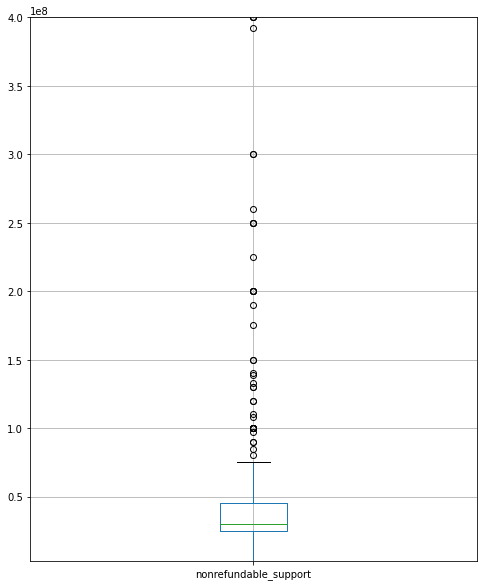

In [39]:
# построим диаграмму размаха

df_cleaned[['nonrefundable_support']].query('nonrefundable_support != 0').boxplot(figsize=(8, 10))
plt.ylim(3000000, 400000000)

Проанализировав статистические данные и график разброса по объему невозвратных средств для фильмов с гос поддержкой видим очень высокое стандартное отклонение, что все же доказывает наличие большого количества аномалий и выбросов. Выбросы наблюдаются для значений, свыше 75 млн руб. Среднее значение более, чем на 50% больше медианы.

In [40]:
# посчитаем процент выбросов

len(df_cleaned[['nonrefundable_support']].query('nonrefundable_support > 75000000')) / len(df_cleaned[['nonrefundable_support']].query('nonrefundable_support != 0'))

0.005554784057769754

Выбросы занимают 0,5%, при необходимости их можно отбросить.

In [41]:
# посмотрим статистические данные по бюджету

df_cleaned[['budget']].query('budget != 0').describe()

,budget
count,315.00
mean,134096082.35
std,191226039.63
min,14462464.00
25%,46153866.50
50%,73379554.00
75%,150004286.50
max,2305074303.00


(0.0, 2305074303.0)

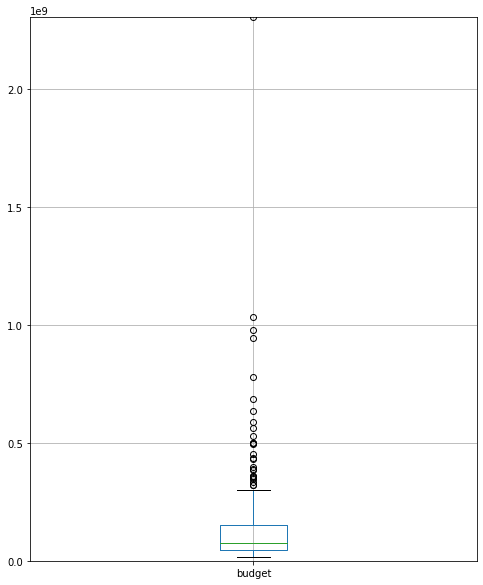

In [42]:
# построим диаграмму размаха по бюджету

df_cleaned[['budget']].query('budget != 0').boxplot(figsize=(8, 10))
plt.ylim(0, 2305074303)

Проанализировав статистические данные и график разброса по объему бюджета для фильмов с гос поддержкой видим очень высокое стандартное отклонение, что все же доказывает наличие большого количества аномалий и выбросов. Выбросы находятся свыше 300 млн руб. Среднее значение почти на 50% больше медианы.

In [43]:
# посчитаем процент выбросов по бюджету

len(df_cleaned[['budget']].query('budget > 300000000')) / len(df_cleaned[['budget']].query('budget != 0'))

0.0038926734325038233

Выбросы занимают 0,3%, при необходимости их можно отбросить.

(1.0, 9.2)

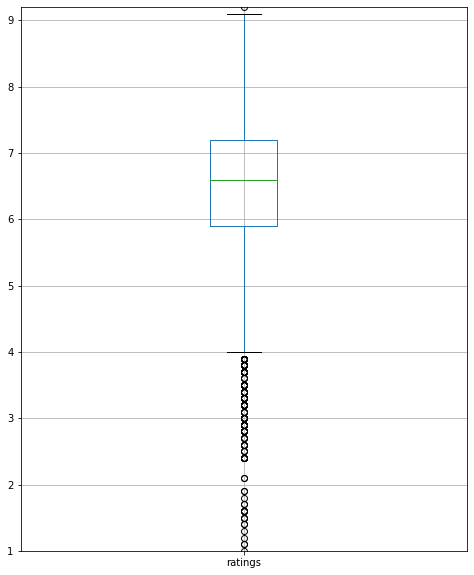

In [44]:
# построим диаграмму размаха по рейтингу

df_cleaned[['ratings']].boxplot(figsize=(8, 10))
plt.ylim(1, 9.20)

Видим аномальные значения в рейтинге, меньше 3,7, среднее и медиана почти на одном уровне, стандартное отклонение небольшое.
Аномальные значения наблюдаются для значений, менее 3.7.

In [45]:
# проверим процент аномальных значений меньше 3.7

len(df_cleaned[['ratings']].query('ratings < 3.7')) / len(df_cleaned[['ratings']].query('ratings != 0'))

0.014563106796116505

Выбросы занимают 1,4%, при необходимости их можно отбросить либо диапазон уменьшить, чтобы процент выбросов был меньше.

(0.0, 3073568690.79)

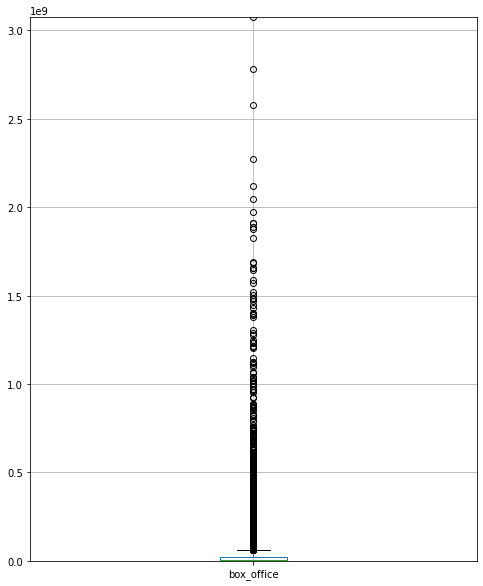

In [46]:
# построим диаграмму размаха по столбцу со сборами

df_cleaned[['box_office']].boxplot(figsize=(8, 10))
plt.ylim(0, 3073568690.79)

Что касается сборов, то среднее значение несравненно больше медианы, стандартное отклонение очень велико, в данных наблюдается огромное количество выбросов и аномалий, свыше 50 млн руб.

In [47]:
# посчитаем процент выбросов

len(df_cleaned[['box_office']].query('box_office > 50000000')) / len(df_cleaned[['box_office']].query('box_office != 0'))

0.08307820762593933

Выбросы занимают 8,3%, такой процент отбрасывать нельзя, но можно диапазон уменьшить, чтобы процент выбросов был меньше.

В целом по количественным показателям можем сказать следующее, у всех рублевых показателях среднее намного больше медианы, стандартное отклонение велико, в данных много аномалий и выбросов.
Что касается рейтинга, нужно выяснять, что подразумевали под процентными значениями.

#### Шаг 2.6. Добавление новых столбцов





- Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.



In [48]:
# заменим пропущенные значения в колонках режиссер и жанр на пустые значения, так как в дальнейшем будет использован
# метод split(), для которого не допустимы значения float, которыми являются пропущенные значения 

df_cleaned['director'] = df_cleaned['director'].fillna(value="unknown")

df_cleaned['genres'] = df_cleaned['genres'].fillna(value="unknown")


In [49]:
# создадим функцию, которая принимает строку, разделяет ее по запятой и возвращает первый элемент

def main_value(row):
    values = row.split(',')
    main_value = values[0]
    return main_value

# применим функцию к колонкам режиссер и жанр и создадим новые столбцы с глдавным режиссером и основным жанром

df_cleaned['director_main'] = df_cleaned['director'].apply(main_value)

df_cleaned['genre_main'] = df_cleaned['genres'].apply(main_value)

# проверим работу кода

df_cleaned.head()    
 

,title,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,director_main,genre_main
0,Открытый простор,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика
4,Остановился поезд,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,NaN,2016,В.Абдрашитов,драма


In [50]:
# проверим, какие жанры являются самыми популярными

df_cleaned['genre_main'].value_counts()

драма              1637
unknown             972
комедия             679
боевик              577
ужасы               547
мультфильм          524
триллер             505
фантастика          380
мелодрама           352
фэнтези             325
документальный      216
аниме                74
мюзикл               62
приключения          55
детектив             53
военный              46
криминал             39
семейный             32
биография            32
детский              28
история              22
короткометражка      13
концерт              12
спорт                 9
музыка                7
вестерн               7
для взрослых          3
фильм-нуар            1
реальное ТВ           1
Name: genre_main, dtype: int64

Самым популярным жанром является драма, также у большого количества фильмов жанр не указан.
На втором месте по популярности - комедия.
Самые непопулярные фильмы - реальное ТВ и фильм-нуар.

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [51]:
# добавим колонку с долей гос поддержки, обозначим ее 'support_part'

df_cleaned['support_part'] = (df_cleaned['nonrefundable_support'] + df_cleaned['refundable_support']) / df_cleaned['budget']

# заменим методом replace() бесконечности в столбце 'replace' на пропуски

df_cleaned['support_part'] = df_cleaned['support_part'].replace(float('inf'), np.nan)

# отфильтруем датафрейм по непропущенным значениям в колонке 'support_part', чтобы посмотреть, как сработал код

df_cleaned[(df_cleaned['support_part'].isna()) != True]

,title,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,director_main,genre_main,support_part
1242,Пока еще жива,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,26500000.00,79411900.00,Министерство культуры,8.10,"драма,мелодрама",365353.60,2013,А.Атанесян,драма,0.33
1403,Бесславные придурки,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,26000000.00,37142857.00,Министерство культуры,NaN,unknown,28140.00,2014,А.Якимчук,unknown,0.70
1452,Невидимки,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,107847945.00,176023490.00,Фонд кино,5.30,"комедия,фантастика",19957031.50,2013,Р.Давлетьяров,комедия,0.61
1478,БЕРЦЫ,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,28000000.00,40574140.00,Министерство культуры,4.20,драма,55917.50,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.69
1739,Братья Ч,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,25000000.00,40015122.00,Министерство культуры,6.40,драма,232100.00,2014,М.Угаров,драма,0.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7188,Союз спасения,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.00,400000000.00,980000000.00,Фонд кино,6.00,"история,биография,драма",717703185.53,2019,А.Кравчук,история,0.51
7190,Иван Царевич и Серый Волк 4,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.00,0.00,190000000.00,Фонд кино,6.70,"мультфильм,приключения,семейный",501069235.00,2019,Д.Шмидт,мультфильм,0.53
7198,Вторжение,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.00,400000000.00,944000000.00,Фонд кино,5.70,"фантастика,боевик",NaN,2019,Ф.Бондарчук,фантастика,0.53
7200,Я свободен,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.00,30000000.00,46154000.00,Министерство культуры,5.90,драма,NaN,2019,И.Северов,драма,0.65


### Вывод
Данные подготовлены к анализу: изменены типы данных, заменены пропущенные значения, удалены дубликаты и добавлены необходимые столбцы.
В связи с тем, что в столбце бюджет были выявлены нули и при расчете доли гос поддержки от общего бюджета произошло деление на ноль, которое Python возвращает значением бесконечности, мы заменили бесконечность на пропуски.

### Шаг 3. Исследовательский анализ данных


- Посмотрим, сколько фильмов выходило в прокат каждый год. Обращаем внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

year
2010    105
2011    109
2012    128
2013    184
2014    279
2015    465
2016    526
2017    357
2018    475
2019    530
Name: box_office, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '2010'),
  Text(1, 0, '2011'),
  Text(2, 0, '2012'),
  Text(3, 0, '2013'),
  Text(4, 0, '2014'),
  Text(5, 0, '2015'),
  Text(6, 0, '2016'),
  Text(7, 0, '2017'),
  Text(8, 0, '2018'),
  Text(9, 0, '2019')])

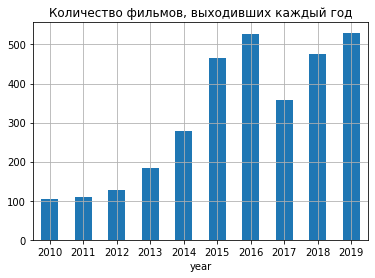

In [52]:
# посмотрим, сколько фильмов выходило в прокат каждый год, отобразим это на графике

display(df_cleaned.groupby('year')['box_office'].count())


df_cleaned.groupby('year')['box_office'].count().plot(kind='bar', grid=True, title="Количество фильмов, выходивших каждый год")

plt.xticks(rotation = 'horizontal')

Наибольшее количество фильмов вышло в прокат в 2019 году, наименьшее - в 2010 г.
Далее расчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах (то есть с указанием данных в колонке 'box_office').

In [53]:
# сохраним в переменную df_cleaned_cinema количество фильмов с указанной информацией о прокате в кинотеатрах

df_cleaned_cinema = len(df_cleaned[(df_cleaned['box_office'].isna()) != True])

# сохраним в переменную df_cleaned_len общее количество фильмов

df_cleaned_len = len(df_cleaned)

# расчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах 

cinema_part = df_cleaned_cinema / df_cleaned_len

cinema_part


0.438002773925104

Данные о прокате в кинотеатрах известны всего для 43,8% фильмов.

- Изучим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

,sum,median
,box_office,box_office
year,,
2010,2428654.000000,1700.000000
2011,14102765.000000,3000.000000
2012,6955423.000000,5660.000000
2013,29799706.200000,3522.500000
2014,7444951859.200001,18160.000000
2015,39497365196.400009,4920933.000000
2016,47866299741.910042,3846679.410000
2017,48563707217.510002,9968340.000000


<AxesSubplot:title={'center':'Динамика проката по годам, медиана сборов'}, xlabel='year'>

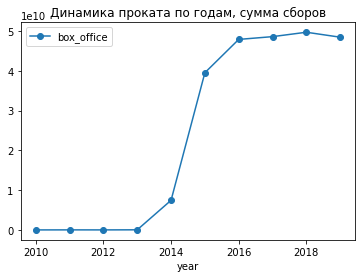

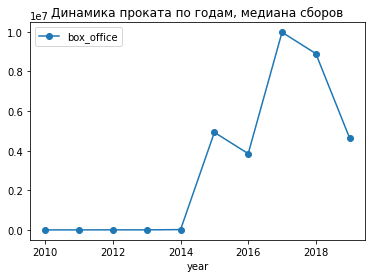

In [54]:
# создадим сводную таблицу с суммарным и медианным значениями сборов по годам

display(df_cleaned.pivot_table(index='year', values='box_office', aggfunc=['sum', 'median']).style.format({'box_office': '{:.2f}'}))

# построим графики с динамикой проката по годам, в одном случае возьмем суммарные сборы, во втором - медианные

df_cleaned.pivot_table(index='year', values='box_office', aggfunc='sum').plot(title="Динамика проката по годам, сумма сборов", style='o-')

df_cleaned.pivot_table(index='year', values='box_office', aggfunc='median').plot(title="Динамика проката по годам, медиана сборов", style='o-')

Минимальная сумма сборов была в 2010 году, а максимальная - в 2018 году.
До 2013 года включительно сборы в тысячи раз меньше сборов в последующих годам.
Плюс к этому, если смотреть по медианному значению, то видим значительный спад в 2018 и 2019 г по сравнению с 2017 годом.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

,box_office_ mean
year,
2010,23130.038095
2011,129383.165138
2012,54339.242188
2013,161954.925000
2014,26684415.265950
2015,84940570.314839
2016,91000569.851540
2017,136032793.326359
2018,104565059.230147


,box_office_ median
year,
2010,1700.00
2011,3000.00
2012,5660.00
2013,3522.50
2014,18160.00
2015,4920933.00
2016,3846679.41
2017,9968340.00
2018,8891102.21


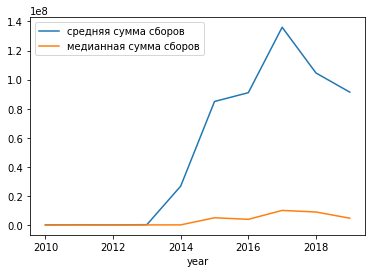

In [55]:
# расчитаем среднюю сумму сборов для каждого года

box_office_mean = df_cleaned.pivot_table(index='year', values='box_office', aggfunc='mean')

# расчитаем медианную сумму сборов для каждого года

box_office_median = df_cleaned.pivot_table(index='year', values='box_office', aggfunc='median')

# переименуем столбцы в сводных таблицах

box_office_mean = box_office_mean.rename(columns={'box_office': 'box_office_ mean'})
box_office_median = box_office_median.rename(columns={'box_office': 'box_office_ median'})

# поменяем формат вывода чисел в таблице со средней суммой сборов

box_office_mean = box_office_mean.style.format({'box_office': '{:.2f}'})

# выведем на экран средние и медианные значения

display(box_office_mean)
display(box_office_median)

# построим графики

ax = df_cleaned.pivot_table(index='year', values='box_office', aggfunc='mean').plot()
df_cleaned.pivot_table(index='year', values='box_office', aggfunc='median').plot(ax=ax)

# дадим название легенде

plt.legend(['средняя сумма сборов', 'медианная сумма сборов'])

Медианная сумма сборов по годам значительно меньше, чем средняя сумма сборов. Связано это с тем, что большинство  фильмов имеют очень маленькую сумму сборов, а небольшое количество фильмов - сумму сборов, во много раз их превышающую. 

- Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года?

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
year,,,,,
2015,379054578.37,13616082008.91,11368120870.27,5432308367.44,8701799371.41
2016,150228848.67,12204446524.39,16664548541.74,6793929818.87,12053146008.24
2017,229598930.00,7851427660.67,18745042900.06,9651495581.02,12086142145.76
2018,32449002.11,14267291660.69,16503602346.96,8760085501.15,10104974623.41
2019,17746066.82,12680198773.67,12753418984.60,10121796303.64,12852548650.86
TOTAL,809077425.97,60619446628.33,76034733643.63,40759615572.12,55798610799.68


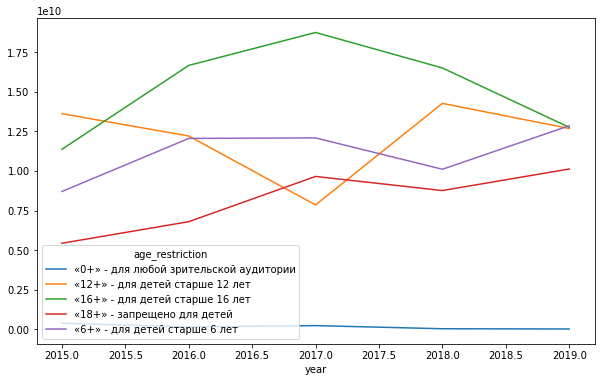

In [56]:
# создадим датафрейм df_cleaned_age_restriction - сводную таблицу с суммой сборов для разных возрастных групп за период с 2015 по 2019 г.

df_cleaned_age_restriction = (df_cleaned.pivot_table(index='year', columns='age_restriction', values='box_office', aggfunc='sum')).query('year >= 2015')

# построим график

df_cleaned_age_restriction.plot(figsize=(10, 6))

# добавим суммарные значения по каждой возрастной группе

df_cleaned_age_restriction.loc['TOTAL'] = df_cleaned_age_restriction.sum()

# выведем сводную таблицу

df_cleaned_age_restriction

Суммарно по годам больше всего денег в прокате собрали фильмы с возрастным ограничением 16+.
Если рассматривать по годам, то:
* в 2015 г - 12+
* в 2016 г - 16+
* в 2017 г - 16+
* в 2018 г - 16+
* в 2019 г - 6+

Таким образом, в зависимости от года картина немного меняется, а именно, в 2015 г и 2019 г. Причина, вероятнее всего, в выходе в прокат оскароносных и/или ожидаемых анимационных фильмов.

### Шаг 4. Исследуем фильмы, которые получили государственную поддержку

Поищем интересные закономерности в данных. Посмотрим, сколько выделяют средств на поддержку кино. Проверим, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [57]:
# добавим столбец с суммарным значением гос поддержки

df_cleaned['support'] = df_cleaned['nonrefundable_support'] + df_cleaned['refundable_support']

count          318.00
mean     132432420.05
std      334837856.99
min           1550.00
25%        1236675.50
50%       15720067.71
75%      106373008.27
max     3073568690.79
Name: box_office, dtype: float64

<AxesSubplot:ylabel='Frequency'>

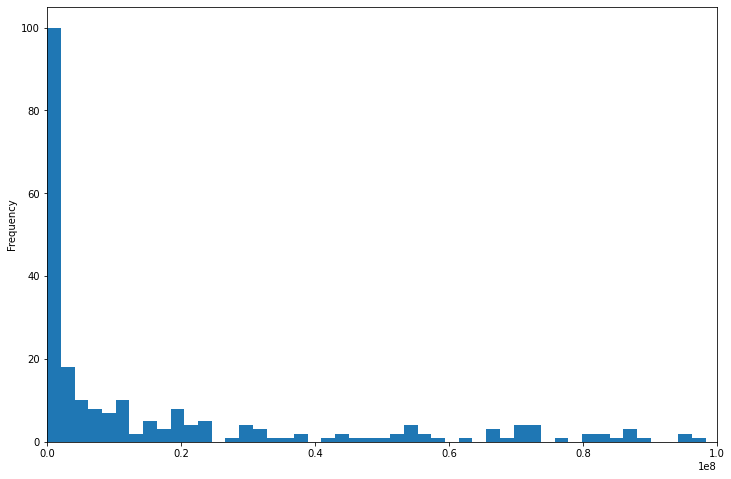

In [58]:
# посмотрим статистические данные по столбцу 'box_office' для фильмов с гос поддержкой

display(df_cleaned.query('support > 0')['box_office'].describe())

# построим гисторамму по сборам для фильмов с гос поддержкой

display(df_cleaned.query('support > 0')['box_office'].plot(kind='hist', bins=1500, figsize=(12, 8), xlim=(0, 100000000)))

Подавляющее большинство фильмов с гос поддержкой имеют сбор от 0 до 2 000 000 руб. Однако, медианное значение составляет 15,7 млн руб. Гистограмма имеет не нормальное распределение и очень длинный хвост с высокими значениями, на что также указывает большое значение стандартного отклонения.

count         332.00
mean     60845446.72
std      72755459.47
min       3000000.00
25%      25333750.00
50%      35000000.00
75%      60000000.00
max     500000000.00
Name: support, dtype: float64

35000000.0

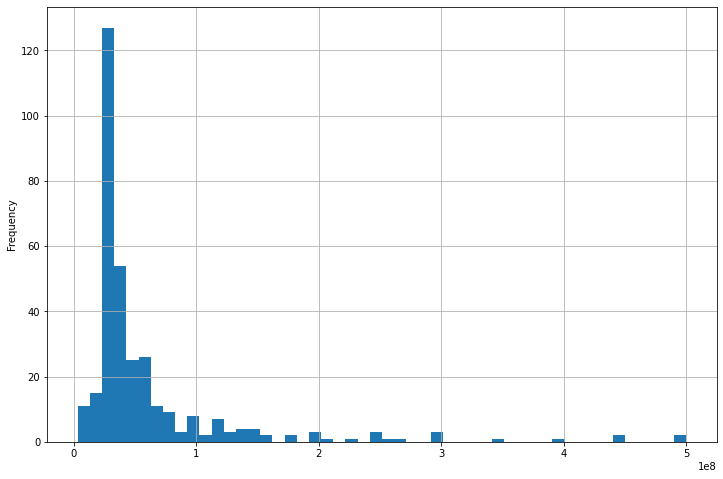

In [59]:
# посмотрим статистические данные по столбцу с суммарной гос поддержкой

display(df_cleaned['support'].describe())

# построим гистограмму

df_cleaned['support'].plot(kind='hist', bins=50, figsize=(12, 8), grid=True)

# расчитаем медианное значение гос поддержки

support_median = df_cleaned['support'].median()

support_median

На подавляющее большинство фильмов в качестве гос поддержки выделяют от 20 до 30 млн руб. Медианное значение 35 млн руб. Гисторамма имеет длинный хвост с аномальными значениями гос поддержки.

Можем сделать вывод, что уровень гос поддержки более, чем в 2 раза больше, чем сборы.

In [60]:
# посчитаем медианное значение доли гос поддержки от общего бюджета

support_part_median = df_cleaned['support_part'].median()
support_part_median

0.5922645480995804

Медианное значение достаточно высокое, что говорит о том, размер гос поддержки превышает уровень коммерческой (продюсерской) поддержки.

In [61]:
# расчитаем окупаемость фильмов с гос проддержкой и добавим столбец со значением окупаемости 

def add_roi(row):
    budget = row['budget']
    box_office = row['box_office']
    if budget != 0:
        roi = (box_office - budget) / budget
        return roi
   
df_cleaned['add_roi'] = df_cleaned.apply(add_roi, axis=1)

# расчитаем медианное значение окупаемости по всем фильмам с гос поддержкой

add_roi_medium = df_cleaned['add_roi'].median()

print(add_roi_medium)

# проверим добавление столбца 'add_roi', отфильтровав фильмы с гос поддержкой

df_cleaned[(df_cleaned['add_roi']).isna() != True].head()      

-0.8513361797921852


,title,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,director_main,genre_main,support_part,support,add_roi
1242,Пока еще жива,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,26500000.00,79411900.00,Министерство культуры,8.10,"драма,мелодрама",365353.60,2013,А.Атанесян,драма,0.33,26500000.00,-1.00
1403,Бесславные придурки,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,26000000.00,37142857.00,Министерство культуры,NaN,unknown,28140.00,2014,А.Якимчук,unknown,0.70,26000000.00,-1.00
1452,Невидимки,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,107847945.00,176023490.00,Фонд кино,5.30,"комедия,фантастика",19957031.50,2013,Р.Давлетьяров,комедия,0.61,107847945.00,-0.89
1478,БЕРЦЫ,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,28000000.00,40574140.00,Министерство культуры,4.20,драма,55917.50,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.69,28000000.00,-1.00
1739,Братья Ч,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,25000000.00,40015122.00,Министерство культуры,6.40,драма,232100.00,2014,М.Угаров,драма,0.62,25000000.00,-0.99


Медианное значение окупаемости составляет минус 0,85, что говорит о том, что бюджет фильма в несколько раз превышает выручку от фильма.

Далее посмотрим взаимосвязь факторов (корреляцию) методом sns.pairplot() для фильмов с гос поддержкой. Для этого отфильтруем датафрейм, оставив только фильмы с гос поддержкой и оставив только нужные факторы. 

In [62]:
# отфильтровываем фильмы с гос поддержкой

df_support_films = df_cleaned[(df_cleaned['support']).isna() != True]

# оставляем только нужные столбцы

df_support_films = df_support_films[['ratings', 'box_office', 'budget', 'year', 'support_part', 'support']]

# проверяем работу кодов

df_support_films

,ratings,box_office,budget,year,support_part,support
1242,8.10,365353.60,79411900.00,2013,0.33,26500000.00
1403,NaN,28140.00,37142857.00,2014,0.70,26000000.00
1452,5.30,19957031.50,176023490.00,2013,0.61,107847945.00
1478,4.20,55917.50,40574140.00,2014,0.69,28000000.00
1739,6.40,232100.00,40015122.00,2014,0.62,25000000.00
...,...,...,...,...,...,...
7188,6.00,717703185.53,980000000.00,2019,0.51,500000000.00
7190,6.70,501069235.00,190000000.00,2019,0.53,100000000.00
7198,5.70,NaN,944000000.00,2019,0.53,500000000.00
7200,5.90,NaN,46154000.00,2019,0.65,30000000.00


In [63]:
# проверим, все ли столбцы имеют числовой тип данных

df_support_films.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 1242 to 7202
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ratings       316 non-null    float64
 1   box_office    318 non-null    float64
 2   budget        332 non-null    float64
 3   year          332 non-null    int64  
 4   support_part  315 non-null    float64
 5   support       332 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 18.2 KB


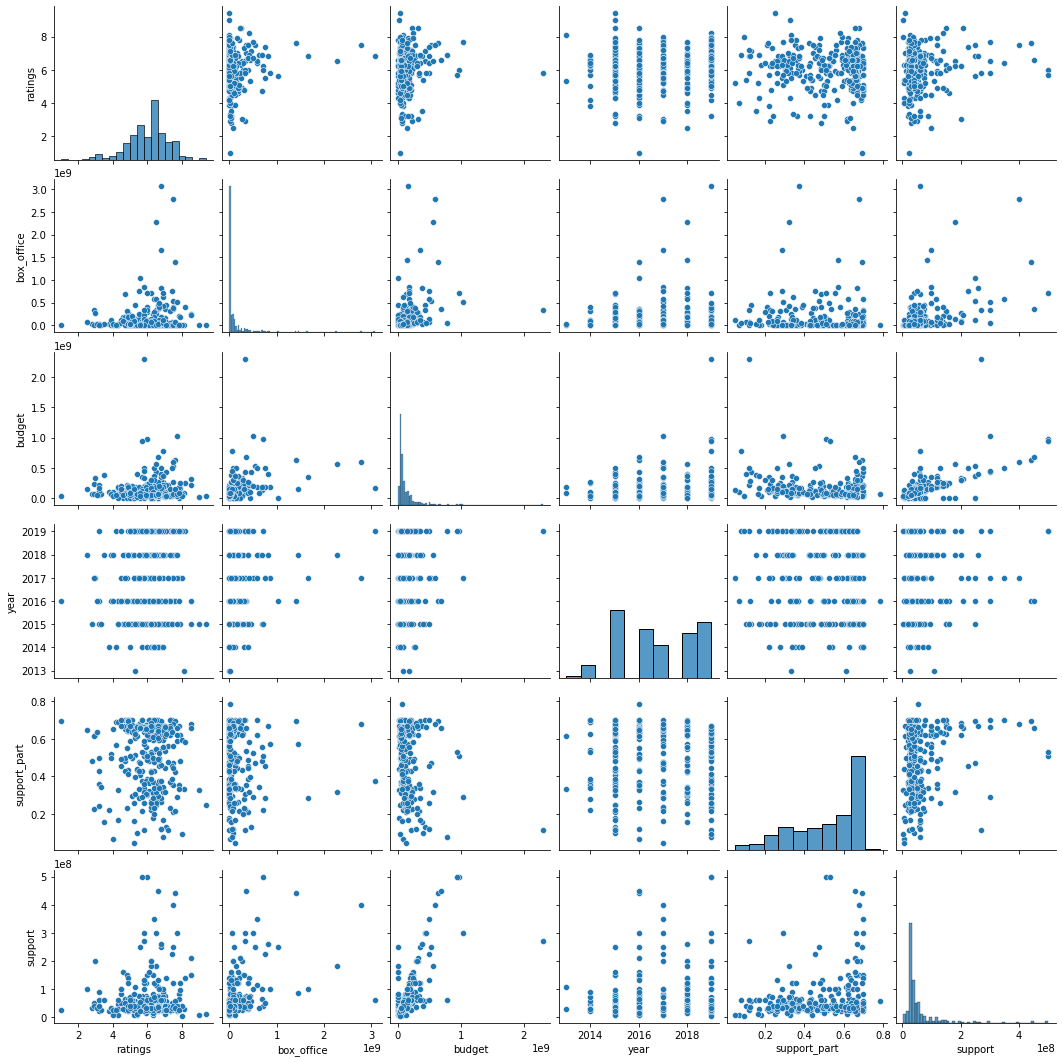

In [64]:
# построим графики корреляции

sns.pairplot(df_support_films)

Проанализируем взаимосвязи:
* фильмы, получившие самый высокий уровень гос поддержки, имеют рейтинги фильма, более 5.
* с ростом суммы гос поддержки, увеличиваются сборы фильма, однако, имеется большое количество фильмов с околонулевым сбором
* с ростом гос поддержки растет бюджет
* фильмы, получившие самый большой сбор, имеют рейтинг, более 6
* выручка растет в хронологическом порядке

### Шаг 5. Общий вывод

Проанализировав фильмы российского кинопроката, выявлены следующие тренды:

* самым популярным жанром является драма,
* больше всего денег в прокате собрали фильмы с возрастным ограничением 16+,
* количество фильмов российского кинопроката увеличивается в хронологическом порядке, но есть спад в 2017 и 2018 гг.,
* в прокат в кинотеатрах были выпущены 43,8 % фильмов,
* минимальная сумма сборов была в 2010 году, а максимальная - в 2018 году. До 2013 года включительно сборы в тысячи раз меньше сборов в последующих годам. А если смотреть по медианному значению, то видим значительный спад в 2018 и 2019 г по сравнению с 2017 годом,
* медианная сумма сборов по годам значительно меньше, чем средняя сумма сборов. Связано это с тем, что большинство фильмов имеют очень маленькую сумму сборов, а небольшое количество фильмов - сумму сборов, во много раз их превышающую.

Что касается фильмов с гос поддержкой, подавляющее большинство  имеют сбор от 0 до 2 000 000 руб. Однако, медианное значение составляет 15,7 млн руб. Связано это с тем, что есть много фильмов с очень высоким сбором (аномальные значения).
На  большинство фильмов в качестве гос поддержки выделяют от 20 до 30 млн руб. Медианное значение 35 млн руб. 

Можем сделать вывод, что уровень гос поддержки более, чем в 2 раза больше, чем сборы.
На это же указывает и медианное значение окупаемости -  минус 0,85, что говорит о том, что бюджет фильма в несколько раз превышает выручку от фильма.
Кроме этого, размер гос поддержки превышает уровень коммерческой (продюсерской) поддержки.

Выявлены следующие взаимосвязи факторов:
* фильмы, получившие самый высокий уровень гос поддержки, имеют рейтинги фильма, более 5.
* с ростом суммы гос поддержки, увеличиваются сборы фильма, однако, имеется большое количество фильмов с околонулевым сбором
* с ростом гос поддержки растет бюджет
* фильмы, получившие самый большой сбор, имеют рейтинг, более 6
* выручка растет в хронологическом порядке

Можем сделать вывод, что фильмы, получившие гос поддержку, не очень интересны зрителю.

К предоставленным данным есть ряд рекомендаций:

* необходимо добавить разграничение, чем отличается один и тот же фильм с разными датами (в пределах года) и номерами прокатного удостоверения. Это необходимо для понимания, один и тот же фильм это или нет
* обнаружены очень низкие значения сборов, нужно перепроверить, верные ли значения и почему они такие низкие.
* исправить формат записи категориальных данных, исключив строки сос знаком тире.
* проверить фильмы, для которых бюджет оказался меньше суммарной поддержки, так как в этом случае бюджет указан неверно.
* проверить, что подразумевается под процентными значениями рейтинга.
